# Problem 6
## A) Breast Cancer 

In [1]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [2]:
X = df.data
y = df.target

Time taken to plot
Gaussian Naive Bayes: 0.9147093749999993s
Linear Discriminant Analysis: 0.24801300000000026s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/

Quadratic Discriminant Analysis: 0.2097280829999999s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Logistic Regression: 0.7832451669999987s
K-nearest neighbor classifier with K = 1: 0.5911465420000006s


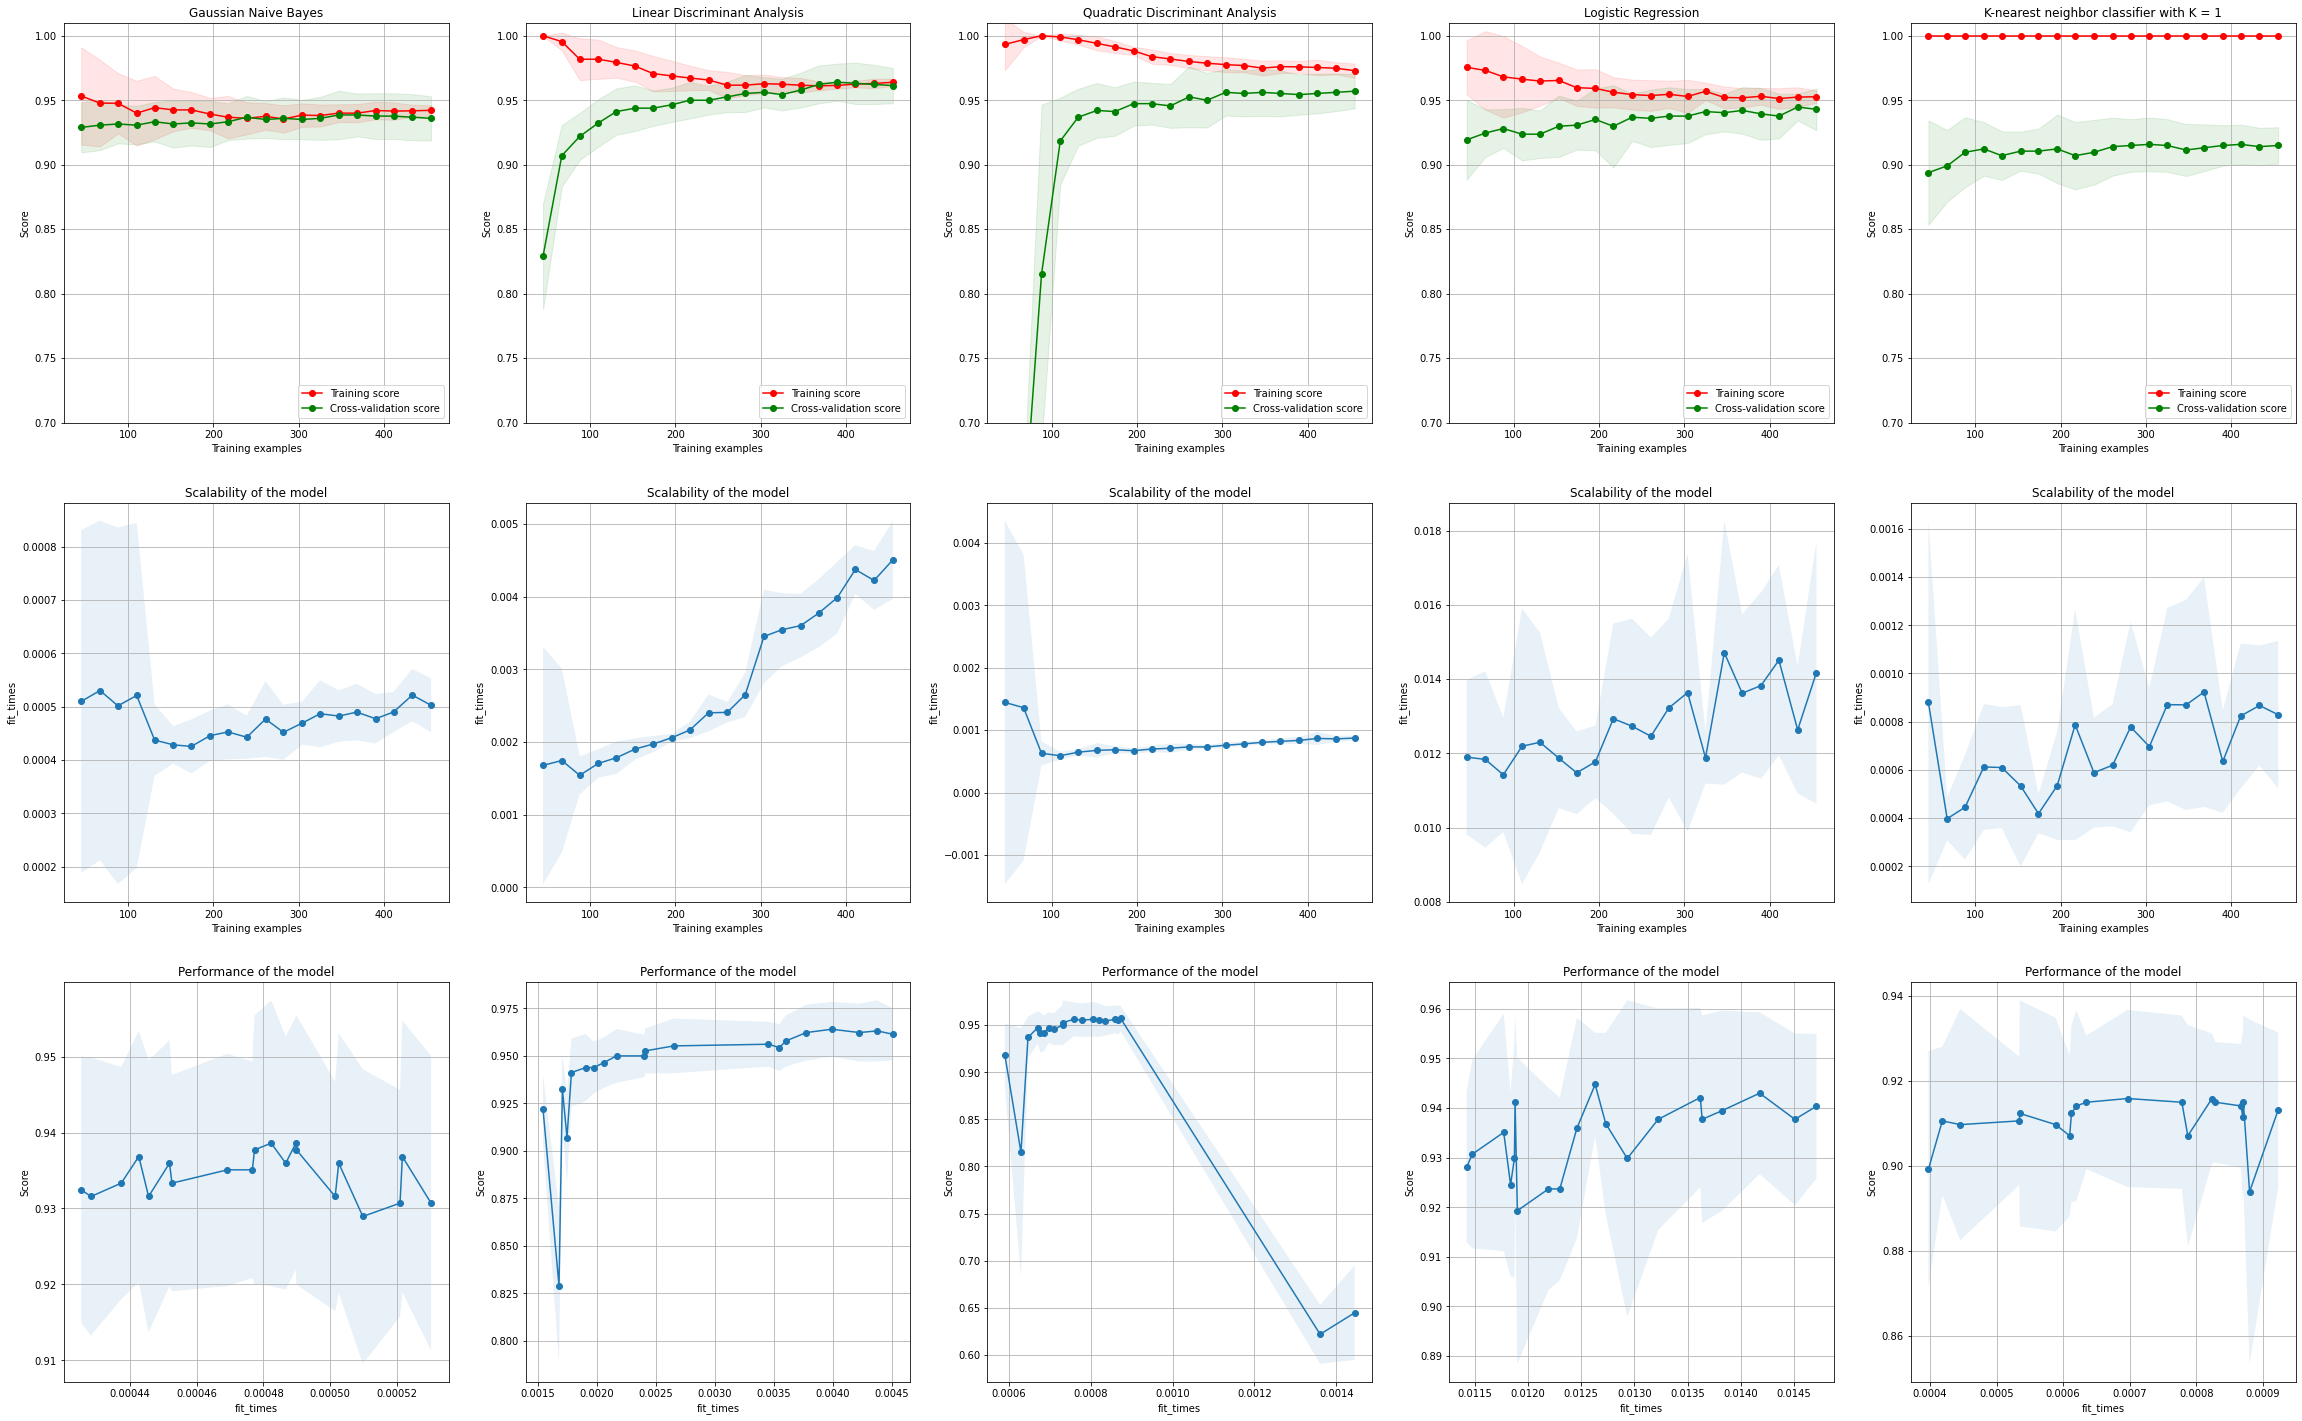

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from timeit import default_timer as timer


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
):

    start = timer()

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)


    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="lower right")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


    end = timer()
    print(f"{title}: {end - start}s")

    return plt

print("Time taken to plot")

fig, axes = plt.subplots(3,5, figsize=(40, 25))
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

title = "Gaussian Naive Bayes"
plot_learning_curve(
    GaussianNB(), title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), n_jobs=4, cv=cv)

title = "Linear Discriminant Analysis"
plot_learning_curve(
    LinearDiscriminantAnalysis(), title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), n_jobs=4, cv=cv
)

title = "Quadratic Discriminant Analysis"
plot_learning_curve(
    QuadraticDiscriminantAnalysis(), title, X, y, axes=axes[:, 2], ylim=(0.7, 1.01), n_jobs=4, cv=cv)

title = "Logistic Regression"
plot_learning_curve(
    LogisticRegression(), title, X, y, axes=axes[:, 3], ylim=(0.7, 1.01), n_jobs=4, cv=cv
)

title = "K-nearest neighbor classifier with K = 1"
plot_learning_curve(
    KNeighborsClassifier(n_neighbors=1), title, X, y, axes=axes[:, 4], ylim=(0.7, 1.01), n_jobs=4, cv=cv
)


plt.show()


### 1)
In order to maximize accuracy, the ideal model would be good at generalizing while not underfitting/overfitting. Such model would have a learning curve where both training and validation scores are high, and the validation score gets close to the training score with increasing amount of data. In this example, the model that best fits this description is the Linear Discriminant Analysis. QDA could also be another option, but it is worth noting that its validation score has higher variance than LDA. 

### 2)
In order to maximize speed with minimum accuracy of 90%, one could choose the GNB. Looking at the second row, training of the GNB model takes roughly 0.001 second even with more than 400 data points. Compared to other models, one can infer that GNB learns faster than any other model. The accuracy of the GNB model is also consistenly over 90%. 

### 3) 
An underfitting classifier would not have the capacity for the complexity of the dataset. Hence, the training score will remain low and unchanged even with more data. In this example, GNB model shows relatively low and flat training score, suggesting that it was unable to learn from increasing amount of training set, hence underfitting. The learning curve of GNB also indicates high bias, but low variance. 

### 4) 
An overfitting classifier would generally have very high variance, and its training score will outperfrom its cross-validation score by a large margin (training loss < validation loss). In this example, KNN model seems to be overfitting. 

### 5) 
We would want a model that shows fixed, high training score and validation score after 100 training sets, which would indicate that the accuracy of the model is sufficietly high and doesn't get affected with more data. The model that fits this description is Logistic Regression. Compared to Logistic Regression, GNB has lower training score (possible underfitting), and KNN has lower validation score (worse at generalizing). LDA and QDA are also inadequete since their ability to generalize keeps improving after 100 datasets.  

## B) Digits

In [4]:
from sklearn.datasets import load_digits
df = load_digits()
X, y = df.data, df.target

Time taken to plot
Gaussian Naive Bayes: 0.22204525000000075s
Linear Discriminant Analysis: 0.5252289579999996s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/

Quadratic Discriminant Analysis: 0.43859087499999916s


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Logistic Regression: 1.4939582920000003s
K-nearest neighbor classifier with K = 1: 1.3959370000000018s


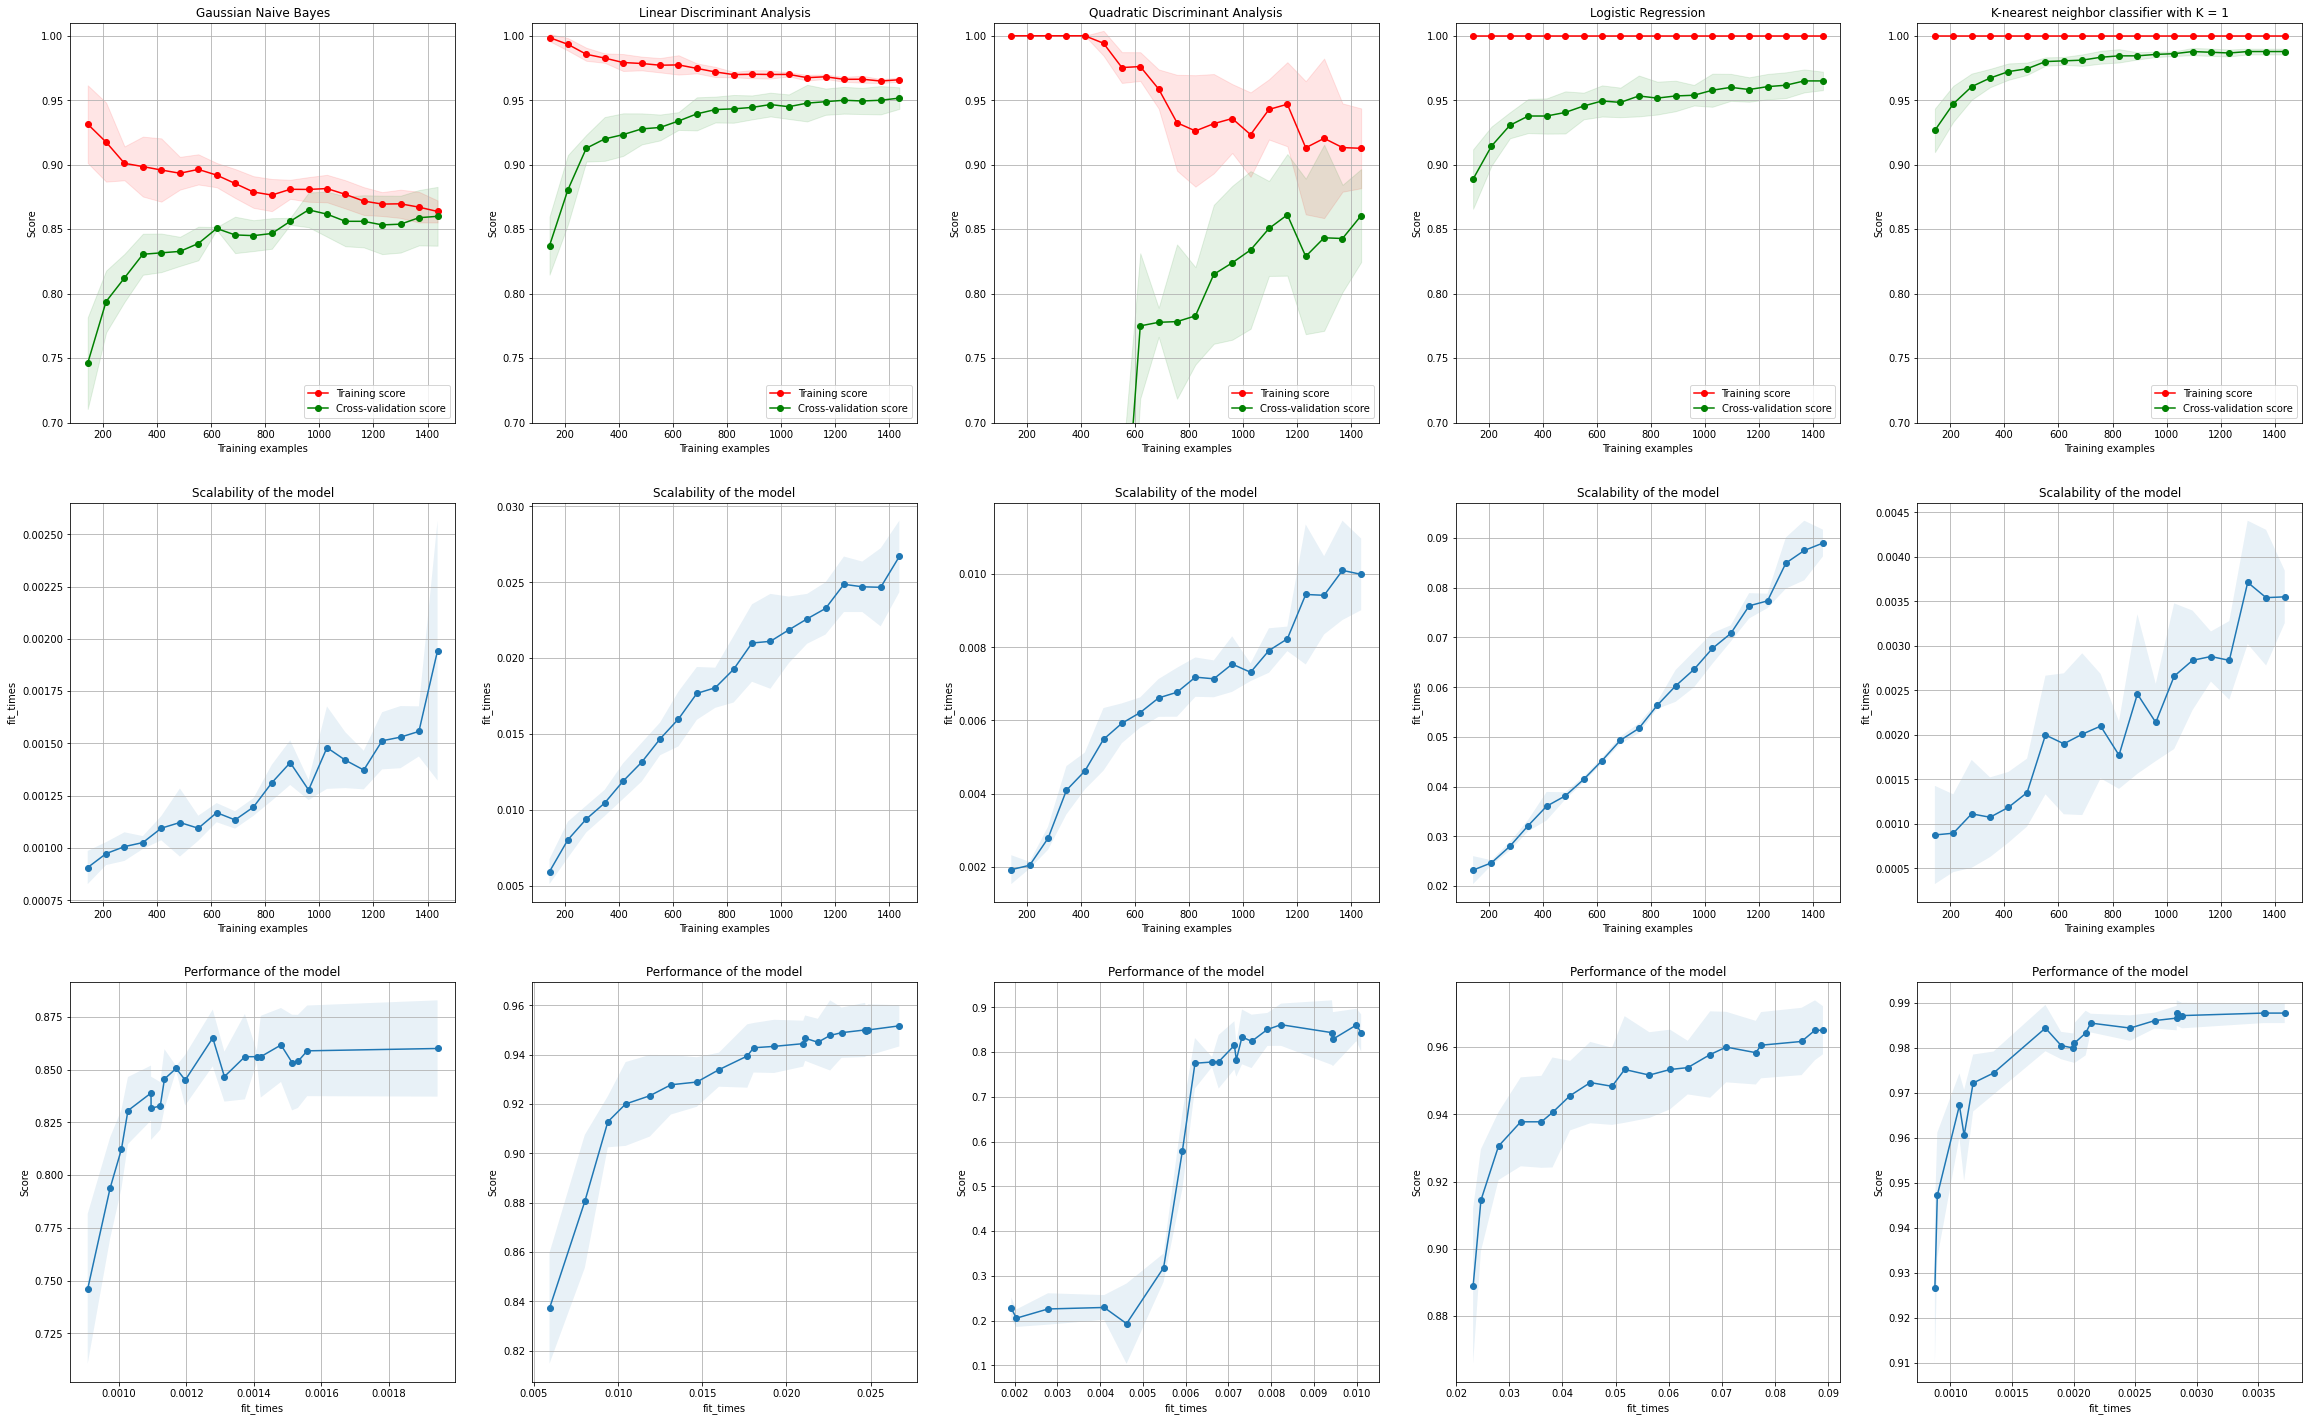

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from timeit import default_timer as timer


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 20),
):

    start = timer()

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)


    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="lower right")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")


    end = timer()
    print(f"{title}: {end - start}s")

    return plt

print("Time taken to plot")

fig, axes = plt.subplots(3,5, figsize=(40, 25))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

title = "Gaussian Naive Bayes"
plot_learning_curve(
    GaussianNB(), title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), n_jobs=4, cv=cv)

title = "Linear Discriminant Analysis"
plot_learning_curve(
    LinearDiscriminantAnalysis(), title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), n_jobs=4, cv=cv
)

title = "Quadratic Discriminant Analysis"
plot_learning_curve(
    QuadraticDiscriminantAnalysis(), title, X, y, axes=axes[:, 2], ylim=(0.7, 1.01), n_jobs=4, cv=cv)

title = "Logistic Regression"
plot_learning_curve(
    LogisticRegression(), title, X, y, axes=axes[:, 3], ylim=(0.7, 1.01), n_jobs=4, cv=cv
)

title = "K-nearest neighbor classifier with K = 1"
plot_learning_curve(
    KNeighborsClassifier(n_neighbors=1), title, X, y, axes=axes[:, 4], ylim=(0.7, 1.01), n_jobs=4, cv=cv
)


plt.show()


### 1) 
With the same reasoning from the previous question, the most accurate model in this example is the KNN. 

### 2) 
Out of the models that show over 90% accuracy, KNN has the lowest ft_time, meaning KNN learns the fastest while not losing its accuracy significantly. 

### 3) 
An underfitting model would have low variance and high bias. The learning curve of GNB and QDA both fit this description. 


### 4) 
Logistic regression has very high training score, yet there is still a significant gap from the validation score. Hence this model is overfitting. 


### 5) 
KNN seems to be the best model given its high training and validation score at 100 data examples. Other models are overfitting and unable to generalize well with 100 data points compared to KNN. 